# Functions used in this work


In [5]:
def newtonsMethod(interval, guess, f, h, maxIterations = 10, samples = None, debug = False):
    '''
    newtonsMethod - finds the root of f through estimation via evaluation of
    the tangent lines of that function.
    f - The function to evaluate, g'(x)  (must be callable)
    h - The callable version of g'/g''  (must be callable)
    interval - The interval upon which f() is continuously differentiable.
    guess - An initial starting point
    maxIterations - The number of times to iterate, or loop, looking for the root
    '''
    if not callable(f) or not callable(h):
        raise ValueError("f and/or h must be callable objects")
    if not interval[0] <= guess <= interval[1]:
       
        raise ValueError("Initial guess lies outside of the provided interval")
        
    iteration = 0

    # Contains a list of tuples which may be treated as x,y pairs
    pointsList = []
    x = guess
    while iteration < maxIterations:
        y = f(x) if samples is None else f(samples, x)
        if debug == True: print("DEBUG: x={}, y={}".format(x, y))
        #if np.isclose(y, 0.0, atol = 1e-2):
        if np.isclose(y, 0.0):
            break
        elif iteration >= maxIterations:
            raise ArithmeticError("No root found for f within max iterations")

        pointsList.append((x, y))
        x = x + h(x) if samples is None else h(samples, x)
        if x < interval[0] or x > interval[1]:
            raise ValueError("There is no solution in this interval")
        iteration += 1

    # If we got here, a root was found
    root = x
    return [(root, iteration), pointsList]

def bisectionMethod(a, b, g, maxIterations = 10, guess = None, samples = None, debug = False):
    # The first check, if g(a) * g(b) > 0, there is no root
    atA = g(a) if samples is None else g(samples, a)
    atB = g(b) if samples is None else g(samples, b)
    if debug == True: print("atA:{}; atB:{}".format(atA, atB))
    if atA * atB > 0.0:
        raise ValueError("No 0 in [{}, {}]".format(a, b))
        
    # Generate a guess by means of
    #  x(t) = (1/2)*(g(a) * g(b))
    nextX = lambda: (1/2)*(a + b)

    found = False
    iteration = 0
    x_t = nextX() if guess is None else guess
    while iteration < maxIterations:
    
        # Ok, the checks are now done, perform the algorithm
        candidateVal = g(x_t) if samples is None else g(samples, x_t)

        # using default values for isclose() as this defaults to a relative
        # tolerance of 1*10^-9 and an absolute tolerance of 0.0
        if np.isclose(candidateVal, 0.0):
            found = True
            break
        
        # We haven't found a root, so shrink the interval
        atA = g(a) if samples is None else g(samples, a)
        if atA * candidateVal <= 0:
            b = x_t
        else:
            a = x_t

        x_t = nextX()
        iteration += 1

    if found:
        # This little bit of apparent craziness makes quirks with floating point
        # representation look correct when we look at it.
        root = abs(x_t) if x_t == -0.0 else x_t
        return (root, iteration)
    else:
        raise RuntimeError("Unable to find a root for g in [{}, {}]".format(a, b))
        
def fixedPointMethod(a, b, gp, L, samples = None, guess = None, debug = False):
    G = lambda samples, x: gp(samples, x) + x
    
    x = (1/2)*(a + b) if guess is None else guess
    iteration = 0
    contracting = True
    while contracting:
        # Generate a candidate root value
        candidate = G(samples, x)
        
        # First, check that we've fully converged
        if np.isclose(candidate, x):
            break
            
        # Check that the function is contractive
        if debug == True:
            print("a:{}; b:{}; candidate:{}; x:{}".format(a, b, candidate, x))
        if not a <= candidate <= b or not a <= x <= b:
            contracting = False
            raise RuntimeError("G(x) is no longer contractive on interval")
            
        # condition 2 for contractiveness
        temp = G(samples, candidate)
        np.abs(candidate - temp) <= L*np.abs(x - candidate)
        
        # keep trying
        x = candidate
        iteration += 1
        
    return (candidate, iteration)

def secantUpdate(x0, x1, f, samples):
    if samples is None:
        t = x1 - f(x1)*(x1 - x0)/(f(x1) - f(x0))
    else:
        t = x1 - f(samples, x1)*(x1 - x0)/(f(samples, x1) - f(samples, x0))

    return x1, t

def secantMethod(x0, x1, f, maxIterations = 10, samples = None, debug = False):
    update = lambda x0, x1: x1 - f(x1)*(x1 - x0)/(f(x1) - f(x0))

    iteration = 0
    while iteration < maxIterations:
        test = f(x1) if samples is None else f(samples, x1)

        if np.isclose(test, 0):
            break

        x0, x1 = secantUpdate(x0, x1, f, samples)

        if debug:
            print("x0 {}; x1 {}; test {}".format(x0, x1, test))

    else:
        raise RuntimeError("Unable to converge to solution")

    return (x1, iteration + 1)

# Homework Problem 1: Iteratively Reweighted Least Squares

In [6]:
# First, read the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipynb.fs.defs.Falanga_HW2 import newtonsMethod
df = pd.read_table('datasets/facerecognition.dat')

# Now, some nicer lambdas for working with this illdefined dataset
weirdKey = 'match eyediff nosecheekdiff variabilityratio'

getMatch = lambda i: int(df[weirdKey][i].split()[0])
getEyeDiff = lambda i: np.float(df[weirdKey][i].split()[1])
getNoseCheekDiff = lambda i: np.float(df[weirdKey][i].split()[2])
getVariabilityRatio = lambda i: np.float(df[weirdKey][i].split()[3])


# Homework Problem 2: Problem 2.1 Pg. 54
**Cauchy Distribution**: C(\theta, 1) with X_i = 1.77, -0.23, 2.76, 3.80, 3.47, 56.75, -1.34, 4.24, -2.44, 3.29, 3.71, -2.40, 4.53, -0.07, -1.05, -13.87, -2.53, -1.75, 0.27, 43.21

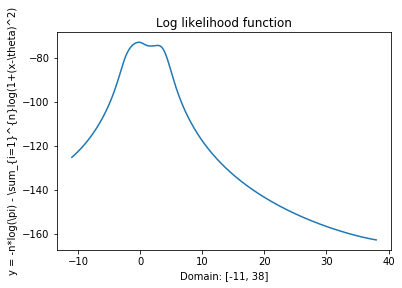

Now use Newton-Raphson method to find the maximum
Starting point -11; max -0.10132118364233782; iterations 50
Starting point -11; max -0.10132118364233782; iterations 50
No maximum found in [0, 1]
No maximum found in [1.5, 3]
No maximum found in [4, 5]
No maximum found in [4.7, 6]
No maximum found in [7, 9]
No maximum found in [8, 10]
No maximum found in [38, 40]


In [7]:
logLikely = lambda x, th: np.log((np.pi * (1 + (x - th)**2))**-1).sum()
obs = np.array([1.77, -0.23, 2.76, 3.80, 3.47, 56.75, -1.34, 4.24, -2.44, 3.29, 3.71, -2.40, 4.53, -0.07, -1.05, -13.87, -2.53, -1.75, 0.27, 43.21])

thetas = np.linspace(-11, 38, 200)
y = np.array([logLikely(obs, t) for t in thetas])
plt.plot(thetas, y)
plt.title("Log likelihood function")
plt.ylabel("y = -n*log(\pi) - \sum_{i=1}^{n}log(1+(x-\\theta)^2)")
plt.xlabel("Domain: [-11, 38]")
plt.show()

# now, find estimates for theta using the Fixed-Point Iterative Method
gp = lambda x, th: 2 * np.sum((x - th)/(np.pi*(1 + (x - th)**2))**2)
gpp = lambda x, th: np.sum((2*th - 2*x)/(1 + (x - th)**2)**2)
step = lambda x, th: gp(x, th)/gpp(x, th)

print("Now use Newton-Raphson method to find the maximum")
allIntervals = [[-11, 0.5], [-1, 0.5], [0, 1], [1.5, 3], [4, 5], [4.7, 6], [7, 9], [8, 10], [38, 40]]
for interval in allIntervals:
    try:
        vals = newtonsMethod(interval, interval[0], gp, step, maxIterations = 50, samples = obs)
        print("Starting point {}; max {}; iterations {}".format(-11, vals[0][0], vals[0][1]))
    except:
        print("No maximum found in [{}, {}]".format(interval[0], interval[1]))


# Problem 2.1(b): Find MLE using bisection method

In [8]:
for intv in [[-2, 0, -1], [0, 3, 1]]:
    vals = bisectionMethod(intv[0], intv[1], gp, maxIterations = 50, guess = intv[2], samples = obs)
    print("Maximum {}; Iterations {}; Initial Guess {}".format(vals[0], vals[1], intv[2]))

Maximum -1.5533092021942139; Iterations 22; Initial Guess -1
Maximum 1.2570688724517822; Iterations 23; Initial Guess 1


# Problem 2.1(c): Find MLE using Fixed-Point Iteration

In [9]:
vals = fixedPointMethod(-3, 0, gp, 1, samples = obs)
print("Converged to {} after {} iterations: L {}".format(vals[0], vals[1], 1))
vals = fixedPointMethod(-3, 0, gp, 0.64, samples = obs)
print("Converged to {} after {} iterations: L {}".format(vals[0], vals[1], 0.64))
vals = fixedPointMethod(-3, 0, gp, 0.25, samples = obs)
print("Converged to {} after {} iterations: L {}".format(vals[0], vals[1], 0.25))

Converged to -1.5531506088155014 after 64 iterations: L 1
Converged to -1.5531506088155014 after 64 iterations: L 0.64
Converged to -1.5531506088155014 after 64 iterations: L 0.25


# Problem 2.1(d): Find MLE using Secant Method

In [10]:
vals = secantMethod(-2, -1, gp, maxIterations = 50, samples = obs, debug = True)
print("Theta {} in {} iterations".format(vals[0], vals[1]))
vals = secantMethod(-3, 3, gp, maxIterations = 50, samples = obs, debug = True)
print("Theta {} in {} iterations".format(vals[0], vals[1]))

x0 -1; x1 -1.5510369668105262; test -0.04440288251240235
x0 -1.5510369668105262; x1 -1.553446710253367; test -0.00019333307614838758
x0 -1.553446710253367; x1 -1.5533094460158816; test 1.1677870237777285e-05
x0 -1.5533094460158816; x1 -1.5533091724900308; test 2.3224162697631822e-08
Theta -1.5533091724900308 in 1 iterations
x0 3; x1 13.809263334552151; test 0.1929201298543256
x0 13.809263334552151; x1 13.697351148454327; test -0.002018267249027645
x0 13.697351148454327; x1 17.453306326849106; test -0.0020802502444110097
x0 17.453306326849106; x1 20.138399421037573; test -0.0008671982151147096
x0 20.138399421037573; x1 24.21136082765596; test -0.0005226452171447957
x0 24.21136082765596; x1 28.275009267885945; test -0.00026102350504943536
x0 28.275009267885945; x1 31.27537676991111; test -0.00011086702637947404
x0 31.27537676991111; x1 31.299590107232294; test -8.875480108189952e-07
x0 31.299590107232294; x1 31.2955491982033; test 1.7779221810250174e-07
Theta 31.2955491982033 in 1 iterat